# Podpunkt 2:
Wczytaj dane z biblioteki Keras, używając zbioru danych Fashion MNIST (from keras.datasets
import fashion_mnist), który zawiera 60 000 obrazów treningowych i 10 000 obrazów testowych, każdy w 28x28 pikselach w odcieniach szarości.

In [1]:
import tensorflow
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sea
import pandas as pd
import numpy as np

In [2]:
# Wczytanie danych fashion mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# co jest w x_train
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [3]:
# zawartość y_train
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

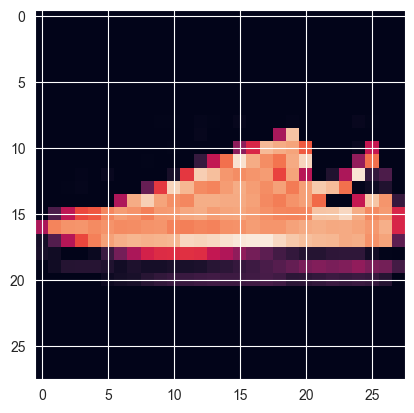

In [4]:
# Przykładowe zdjęcie z naszego zbioru treningowego
plt.imshow(x_train[6])

# Podpunkt 3:
Przygotuj dane do trenowania modelu poprzez normalizację wartości pikseli do zakresu od 0 do
1 oraz przekształcenie etykiet kategorii na postać one-hot encoding.

In [5]:
# Normalizacja danych
x_train = x_train / 255.0
x_test = x_test / 255.0

# Podpunkt 4
Zbuduj model sieci neuronowej w Keras, składający się z warstw konwolucyjnych, warstw poolingowych i warstw w pełni połączonych.

In [12]:
# Definicja modelu CNN
model = Sequential([
 Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)),
 MaxPooling2D((2, 2)),
 Conv2D(64, (3, 3), activation='relu'),
 MaxPooling2D((2, 2)),
 Conv2D(64, (3, 3), activation='relu'),
 Flatten(),
 Dense(64, activation='relu'),
 Dense(10, activation='softmax')
])


# Kompilacja modelu
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

# Podpunkt 5 i 6
- Trenuj model na danych treningowych przez określoną liczbę epok (np. 10), określając także
  dane walidacyjne do monitorowania wydajności modelu podczas trenowania.
- Dokonaj oceny modelu poprzez ewaluacji jego wydajności na zbiorze testowym oraz wizualizację wyników

In [13]:
# Trenowanie modelu
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Ocena modelu
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Dokładność klasyfikacji:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4957 - accuracy: 0.8187 - val_loss: 0.3760 - val_accuracy: 0.8630
Epoch 2/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3159 - accuracy: 0.8839 - val_loss: 0.3184 - val_accuracy: 0.8860
Epoch 3/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2692 - accuracy: 0.9012 - val_loss: 0.3021 - val_accuracy: 0.8866
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2419 - accuracy: 0.9105 - val_loss: 0.2859 - val_accuracy: 0.8964
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.2808 - accuracy: 0.9012
Dokładność klasyfikacji: 0.901199996471405


# Podpunkt 7
Przeprowadzić predykcje na nowych danych i dokładniej zbadać wyniki za pomocą macierzy
pomyłek oraz raportu klasyfikacji.

In [14]:
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [15]:
y_pred

array([[4.5400796e-08, 2.4143001e-09, 1.0149941e-07, ..., 7.6732235e-03,
        1.4672167e-07, 9.9215877e-01],
       [1.5671327e-04, 1.8788396e-10, 9.9950647e-01, ..., 5.2508352e-14,
        1.0333487e-06, 2.0286226e-09],
       [6.8457994e-06, 9.9999046e-01, 1.6706167e-08, ..., 3.4785103e-13,
        1.9983078e-08, 3.9278164e-12],
       ...,
       [2.6038693e-08, 1.6549912e-15, 1.2485517e-09, ..., 7.0606971e-12,
        1.0000000e+00, 1.7266988e-11],
       [4.2612246e-06, 9.9996614e-01, 7.9847247e-08, ..., 9.6327959e-11,
        8.1130753e-07, 3.5092467e-09],
       [2.0011600e-04, 1.8763809e-07, 3.1658419e-05, ..., 9.0769060e-02,
        7.1745535e-04, 8.3176412e-05]], dtype=float32)

In [16]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

[887 966 885 913 830 960 683 989 975 924]


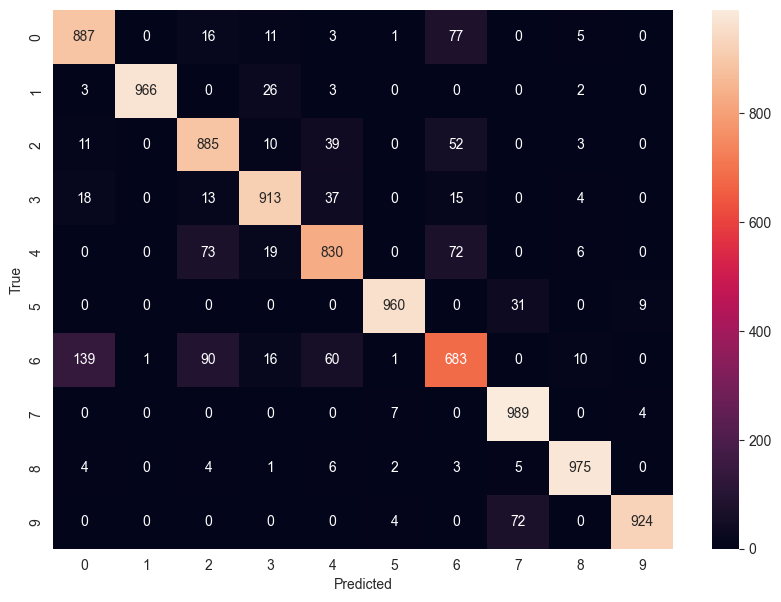

In [17]:
# Obliczenie confusion matrix

cm = confusion_matrix(y_test, y_pred)

print(cm.diagonal())

# Tworzenie DataFrame z confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in range(10)], columns = [i for i in range(10)])

# Tworzenie heatmapy confusion matrix
plt.figure(figsize = (10,7))
sea.heatmap(df_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Wnioski
Moja sieć jest zajebista :)